In [2]:
import sklearn.datasets  as datasets #引用数据
from sklearn.neighbors  import KNeighborsClassifier #KN分类器

In [3]:
#抓取数据当作训练的样本
iris=datasets.load_iris() #蓝蝴蝶
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [4]:
x_train=iris.data[::2] #样本数据
x_train

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.8,  3.1,  1.6,  0.2],
       [ 5.2,  4.1,  1.5,  0.1],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.5,  3.5,  1.3,  0.2],
       [ 4.4,  3. ,  1.3,  0.2],
       [ 5. ,  3.5,  1.3,  0.3],
       [ 4.4,  3.2,  1.3,  0.2],
       [ 5.1,  3.8,  1.9,  0.4],
       [ 5.1,  3.8,  1.6,  0.2],
       [ 5.3,  3.7,  1.5,  0.2],
       [ 7. ,  3.2,  4.7,  1.4],
       [ 6.9,  3.1,  4.9,  1.5],
       [ 6.5,  2.8,  4.6,  1.5],
       [ 6.3,  3.3,  4.7,  1.6],
       [ 6.6,  2.9,  4.6,  1.3],
       [ 5

In [5]:
y_train=iris.target[::2] #样本数据
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [6]:
x_test=iris.data[1::2] #knn结果
x_test

array([[ 4.9,  3. ,  1.4,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 5.4,  3.4,  1.5,  0.4],
       [ 5.5,  4.2,  1.4,  0.2],
       [ 5. ,  3.2,  1.2,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.1,  3.4,  1.5,  0.2],
       [ 4.5,  2.3,  1.3,  0.3],
       [ 5. ,  3.5,  1.6,  0.6],
       [ 4.8,  3. ,  1.4,  0.3],
       [ 4.6,  3.2,  1.4,  0.2],
       [ 5. ,  3.3,  1.4,  0.2],
       [ 6.4,  3.2,  4.5,  1.5],
       [ 5.5,  2.3,  4. ,  1.3],
       [ 5.7,  2.8,  4.5,  1.3],
       [ 4.9,  2.4,  3.3,  1. ],
       [ 5.2,  2.7,  3.9,  1.4],
       [ 5

In [7]:
y_test=iris.target[1::2]
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [8]:
knn=KNeighborsClassifier() #创建KNN分类器

In [9]:
knn.fit(x_train,y_train) #训练数据

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
y_=knn.predict(x_test) #数据预测

In [11]:
y_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [12]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [13]:
knn.score(x_test,y_test) #评分，

0.98666666666666669

In [14]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
import  matplotlib.pyplot as plt
%matplotlib  inline
from  matplotlib.colors  import  ListedColormap #绘图引用的模块

In [16]:
cmap=ListedColormap(["#FF0000","#00FF00","#0000FF"])#颜色列表

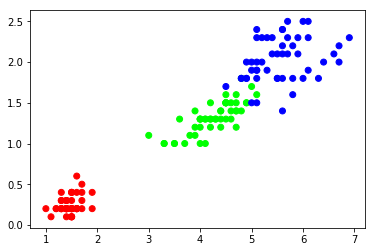

In [17]:
plt.scatter(iris.data[:,2],iris.data[:,3],
            c=iris.target,cmap=cmap) #绘制散点图，根据颜色分类

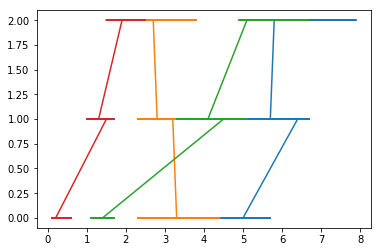

In [18]:
plt.plot(x_test,y_test)

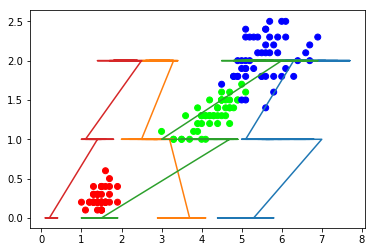

In [19]:
plt.scatter(iris.data[:,2],iris.data[:,3],
            c=iris.target,cmap=cmap) 
#plt.plot(x_test,y_test)
plt.plot(x_train,y_train)

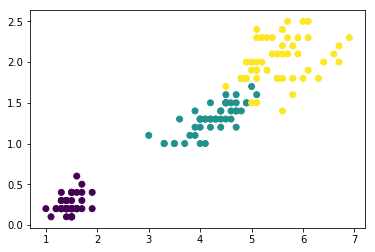

In [20]:
plt.scatter(iris.data[:,2],iris.data[:,3],
            c=iris.target) #绘制散点图，根据颜色分类

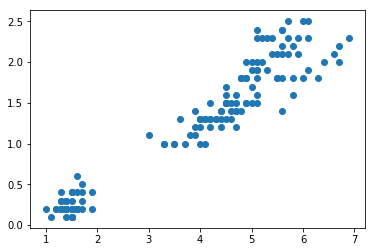

In [21]:
plt.scatter(iris.data[:,2],iris.data[:,3])

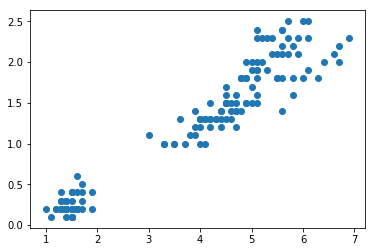

In [23]:
plt.scatter(iris.data[:,2],iris.data[:,3])